In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
circuit = QuantumCircuit(2,2)  # (2,2) => 2 qubit 2 klasik bit oluştur demek

In [3]:
#quantum_register = QuantumRegister(2)#böyle ayrı ayrı da yapabiliriz, bu satırla 2 tane qubit oluştururuz
#classical_register = ClassicalRegister(2) # 2 tane klasik bit oluşturur
#circuit = QuantumCircuit(quantum_register,classical_register)

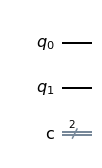

In [4]:
circuit.draw() # devreyi görüntüleriz

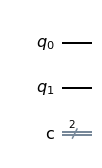

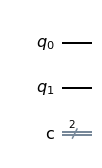

In [5]:
%matplotlib inline
circuit.draw(output="mpl") # matplotlib ile de görselleştirebiliriz

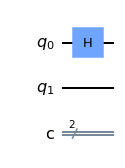

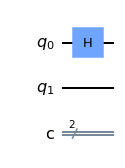

In [6]:
#circuit. #circuit. yazıp taba basarak kullanabileceğimiz fonksiyonları görebiliriz
circuit.h(0) # h => hadamard gate kullandık, parametre olarak da hangi qubite gate'i uygulayacaksak
# onun indexini yatarız, birden fazla kullanmak için h([0,1]) şeklinde yazarız 

circuit.draw(output="mpl")

In [7]:
# entanglementi sağlamak için bir de CNOT (CX) Gate i yapmamız gerekir
circuit.cx(0,1) # 0 ve 1. qubitleri birbirine bağlamış oluruz
#0 => control qubit, 1 => target qubit

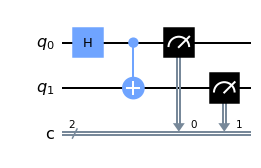

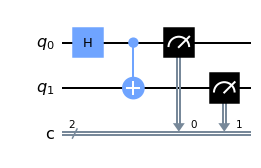

In [8]:
circuit.measure([0,1],[0,1])
"""measure ile ölçümleri yaparız
0. ve 1. qubitleri ölçeriz, 0. qubiti 0. klasik bitte, 1. qubiti 1. klasik bitte gösterir
([0,1],[1,0]) yazsak tam tersi şekilde, 0. qubiti 1. klasik bitte, 1. qubiti . klasik bitte gösterir"""

"""aynı measure satırını birden fazla kez çalıştırırsak her seferinde önceki meausere'ların üstüne
yeni measure'lar ekler"""

circuit.draw(output="mpl")

In [9]:
# simülatörde çalıştırmak
simulator = Aer.get_backend("qasm_simulator") #backendi qasm_simulator olarak ayarlar

In [14]:
from qiskit import execute
results = execute(circuit,backend=simulator).result() #(çalıştırılacak_devre,hangi_backend) , .result() ekleyerek de sonuçları görürüz

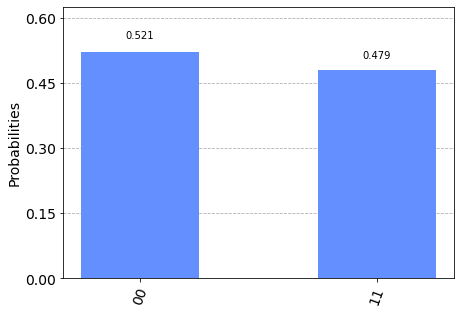

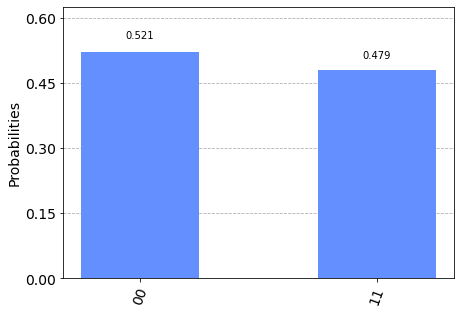

In [16]:
#from qiskit.visualization import * dan 
plot_histogram(results.get_counts(circuit))

In [17]:
# beginng2'den sonra

In [18]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-19 10:48:23,780: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
provider = IBMQ.get_provider("ibm-q")

In [22]:
quantum_computer = provider.get_backend("ibmq_lima") # limada az önce sıra azdı

In [26]:
%qiskit_job_watcher
job = execute(circuit,backend=quantum_computer)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Job Status: job has successfully run


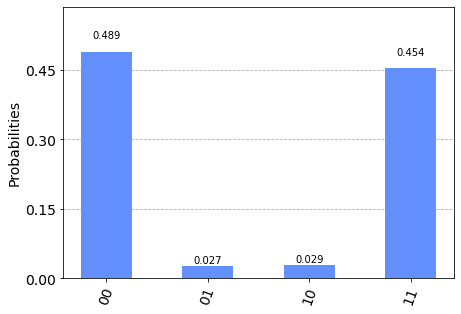

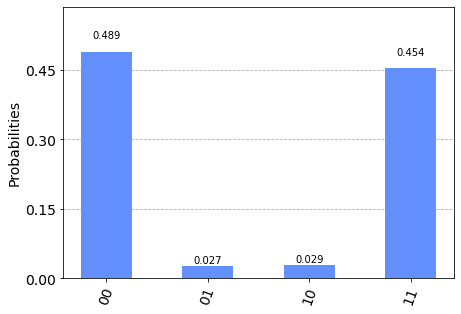

In [27]:
quantum_results = job.result()
plot_histogram(quantum_results.get_counts(circuit))

In [28]:
""" yukarıdaki gibi 01 10 sonuçları da geldi (küçük ihtimallerle de olsa) çünkü quantum bilgisayarlar hala %100 mükemmel
hale gelmedi. Quantum Noise denilen bir kavram var => Burada da qubitleri quantum state'den çıkarabilecek durumlar (noise'lar)
olabilir. (quantum bilgisayarlar neredeyse mutlak sıfıra yakın derecede tutulur, stabil halde durabilmesi quantum özelliklerini
kaybetmemesi için, yine de çok küçük ısı artışı veya seslerle quantum statelerini kaybedebiliyorlar bu yüzden farklı
sonuçlar verebiliyorlar). Önemli olan beklenilen şeylerin yeterli olasılıkta olması. Simülatörlerde bu tür durumlar olmaz """

In [29]:
#%qiskit_job_watcher sürekli arka planda izlemeye devam eder (enerji/kaynak tüketir) o yüzden kullanmadığmızda kapatmamız gerekir:
%qiskit_disable_job_watcher